In [1]:
"""
In this machine learning project, I have collected the dataset from Kaggle.
In this project I have developed  basic recommendation systems using Python and Machine Learning. 
This a basic recommendation system which suggests you movies that are most similar to a particular movie of your choice.

"""

# Import Libraries

import numpy as np
import pandas as pd

In [16]:
#Get the Data
data = pd.read_csv('Movies Data.csv')
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [17]:
#Now let's get the movie titles:
movie_titles = pd.read_csv('Movies Id Titles.csv',encoding="ISO-8859-1")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [18]:
#We can merge them together:
data = pd.merge(data,movie_titles,on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [14]:
#Let's explore the data a bit and get a look at some of the best rated movies.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [19]:
#Let's create a ratings dataframe with average rating and number of ratings:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saint of Fort Washington                             5.0
Great Day in Harlem                                  5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Prefontaine (1997)                                   5.0
Someone Else's America (1995)                        5.0
Name: rating, dtype: float64

In [20]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806


In [22]:
#Now set the number of ratings column:
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93


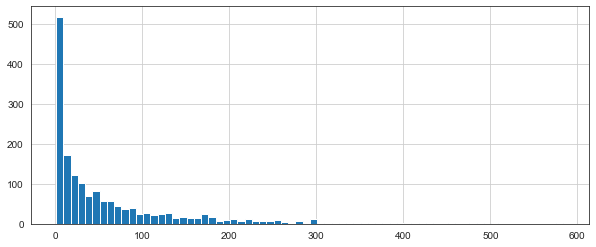

In [23]:
#histograms visualization
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

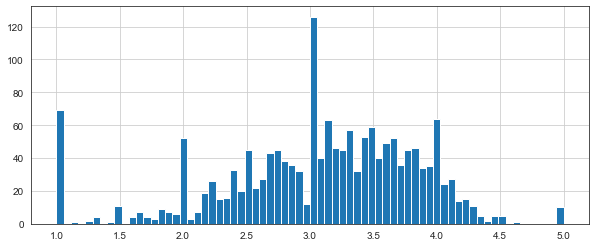

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

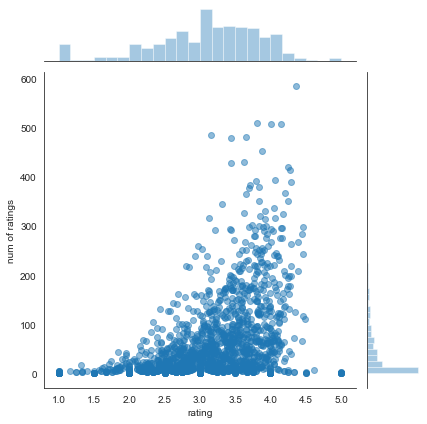

In [25]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [26]:
# Now we have a general idea of what the data looks like, let's move on to creating a simple recommendation system
"""
Now let's create a matrix that has the user ids on one access and the movie title on another axis. 
Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, 
because most people have not seen most of the movies.
"""
moviemat = data.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),39 Steps,8 1/2 (1963),8 Heads in a Duffel Bag (1997),...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Poisoner's Handbook,Zeus and Roxanne (1997),unknown,ç kldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Most rated movie:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
English Patient,3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [28]:
#Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.
ratings.head()

,rating,num of ratings
title,,
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93


In [29]:
#Let's choose two movies: starwars, a science fiction movie. And Liar Liar, a comedy.
#And let's grab the user ratings for those two movies:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [30]:
#We can use corrwith() method to get correlations between two pandas series:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

c:\users\deepak\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\deepak\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
#Let's clean this by removing NaN values and using a DataFrame instead of a series:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654


In [32]:
"""
Now if we sort the dataframe by correlation, we should get the most similar movies, 
however note that we get some results that don't really make sense. 
This is because there are a lot of movies only watched once by users who also watched star wars 
(it was the most popular movie).
"""


corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
No Escape (1994),1.0
Line King: Al Hirschfeld,1.0
Outlaw,1.0


In [33]:
#Let's fix this by filtering out movies that have less than 100 reviews.
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93


In [34]:
#Now sort the values and notice how the titles make a lot more sense:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
Empire Strikes Back,0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [ ]:
"""
It means if we are watching Star wars then movie recommender system can recommend us 'Empire Strikes Back' 
or 'Return of the Jedi ' as next movie. Because of high ratings and correlation with Star Wars.
"""


In [35]:
#Now the same for the comedy Liar Liar:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Mask,0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [ ]:
"""
It means if we are watching Liar Liar then movie recommender system can recommend us 'Batman Forever' 
or  'Mask' as next movie. Because of high ratings and correlation with Liar Liar.
"""